In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']

import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

# 航班数据
feature = pd.read_table('/Users/tuyu/000000毕业设计/Flight_Delay/Train_Feature/final_feature.csv',sep=',',encoding='gb2312')
feature.head()

,航班编号,计划起飞时间,计划到达时间,计划起飞时刻,计划到达时刻,计划飞行时间,起飞间隔,前序延误,平均延误时间,最大延误时间,...,本时段实际进港延误航班数,本时段离港延误时长,本时段离港平均延误时长,本时段离港延误率,上一时段离港平均延误时长,上一时段进港延误时长,上一时段离港延误时长,上一时段实际进港航班数,上一时段进港延误率,标签
0,CZ3855,16801,16801,0,3,3.666667,NaN,NaN,1.963379,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,CZ3855,16801,16801,0,3,3.666667,NaN,NaN,1.963379,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,CZ3855,16801,16801,0,1,1.250000,NaN,NaN,1.963379,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,CZ3855,16801,16801,0,1,1.250000,NaN,NaN,1.963379,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,CZ3295,16801,16801,0,1,1.166667,NaN,NaN,0.324175,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [2]:
# final_feature = origin_feature[['航班编号','计划起飞时间','计划到达时间','计划起飞时刻','计划到达时刻','计划飞行时间',
#                                 '起飞间隔','前序延误','平均延误时间','最大延误时间','延误时间中位数','延误时间标准差',
#                                 '是否为去程航班','是否为国内航班', 
#                                 '航班月份','航班季节F1','出发特情','到达特情','出发机场天气得分','到达机场天气得分',
#                                 '出发机场aqi等级评分','到达机场aqi等级评分',
#                                 '出发机场风力等级评分','到达机场风力等级评分','计划到达前3小时时刻','计划起飞前2小时时刻',
#                                 '本时段计划离港航班数','本时段实际离港航班数',
#                                 '本时段进港延误时长','本时段实际进港延误航班数','本时段离港延误时长','本时段离港平均延误时长',
#                                 '本时段离港延误率',
#                                 '上一时段离港平均延误时长','上一时段进港延误时长','上一时段离港延误时长', 
#                                 '上一时段实际进港航班数','上一时段进港延误率','标签']]
                                
feature  = feature.drop(['计划起飞时刻','计划到达时刻','计划到达前3小时时刻','计划起飞前2小时时刻','本时段离港平均延误时长','上一时段离港平均延误时长'],axis = 1)



In [3]:
feature0 = feature[feature['标签'] == 0]
feature0new = feature0.sample(frac=0.1, replace=False, random_state=None,axis=0)
feature1 = feature[feature['标签'] == 1]
featureGBDT = pd.concat([feature0new,feature1],axis=0, ignore_index=True)
featureGBDT = featureGBDT.sample(frac=0.1, replace=False, random_state=None,axis=0)


In [4]:
print(len(featureGBDT))
print(sum(featureGBDT['标签'] == 1))
print(sum(featureGBDT['标签'] == 0))

126121
55099
71022


In [5]:
# 1.前序延误 = 前序航班 实际到达时间 - 计划到达时间
# 2.起飞间隔 = 当前航班的计划起飞时间 - 前序航班实际到达时间
featureGBDT['起飞间隔'] = featureGBDT['起飞间隔'].fillna(0)
featureGBDT['前序延误'] = featureGBDT['前序延误'].fillna(0)
featureGBDT['出发机场天气得分'] = featureGBDT['出发机场天气得分'].interpolate()
featureGBDT['到达机场天气得分'] = featureGBDT['到达机场天气得分'].interpolate()
featureGBDT['平均延误时间'] = featureGBDT['平均延误时间'].interpolate()
featureGBDT['最大延误时间'] = featureGBDT['最大延误时间'].interpolate()
featureGBDT['延误时间中位数'] = featureGBDT['延误时间中位数'].interpolate()
featureGBDT['延误时间标准差'] = featureGBDT['延误时间标准差'].interpolate()
featureGBDT['本时段计划离港航班数'] = featureGBDT['本时段计划离港航班数'].fillna(featureGBDT['本时段计划离港航班数'].mean())
featureGBDT['本时段实际离港航班数'] = featureGBDT['本时段实际离港航班数'].fillna(featureGBDT['本时段实际离港航班数'].mean())
featureGBDT['本时段进港延误时长'] = featureGBDT['本时段进港延误时长'].fillna(featureGBDT['本时段进港延误时长'].mean())
featureGBDT['本时段实际进港延误航班数'] = featureGBDT['本时段实际进港延误航班数'].fillna(featureGBDT['本时段实际进港延误航班数'].mean())
featureGBDT['本时段离港延误时长'] = featureGBDT['本时段离港延误时长'].fillna(featureGBDT['本时段离港延误时长'].mean())
featureGBDT['本时段离港延误率'] = featureGBDT['本时段离港延误率'].fillna(featureGBDT['本时段离港延误率'].mean())
featureGBDT['上一时段进港延误时长'] = featureGBDT['上一时段进港延误时长'].fillna(featureGBDT['上一时段进港延误时长'].mean())
featureGBDT['上一时段离港延误时长'] = featureGBDT['上一时段离港延误时长'].fillna(featureGBDT['上一时段离港延误时长'].mean())
featureGBDT['上一时段实际进港航班数'] = featureGBDT['上一时段实际进港航班数'].fillna(featureGBDT['上一时段实际进港航班数'].mean())
featureGBDT['上一时段进港延误率'] = featureGBDT['上一时段进港延误率'].fillna(featureGBDT['上一时段进港延误率'].mean())




In [6]:
feature0LSTM = feature0new.sample(frac=0.2, replace=False, random_state=None,axis=0)
feature1LSTM = feature1.sample(frac=0.2, replace=False, random_state=None,axis=0)
featureLSTM = pd.concat([feature0LSTM,feature1LSTM],axis=0, ignore_index=True)
# 1.前序延误 = 前序航班 实际到达时间 - 计划到达时间
# 2.起飞间隔 = 当前航班的计划起飞时间 - 前序航班实际到达时间
featureLSTM['起飞间隔'] = featureLSTM['起飞间隔'].fillna(0)
featureLSTM['前序延误'] = featureLSTM['前序延误'].fillna(0)
featureLSTM['出发机场天气得分'] = featureLSTM['出发机场天气得分'].interpolate()
featureLSTM['到达机场天气得分'] = featureLSTM['到达机场天气得分'].interpolate()
featureLSTM['平均延误时间'] = featureLSTM['平均延误时间'].interpolate()
featureLSTM['最大延误时间'] = featureLSTM['最大延误时间'].interpolate()
featureLSTM['延误时间中位数'] = featureLSTM['延误时间中位数'].interpolate()
featureLSTM['延误时间标准差'] = featureLSTM['延误时间标准差'].interpolate()
featureLSTM['本时段计划离港航班数'] = featureLSTM['本时段计划离港航班数'].fillna(featureLSTM['本时段计划离港航班数'].mean())
featureLSTM['本时段实际离港航班数'] = featureLSTM['本时段实际离港航班数'].fillna(featureLSTM['本时段实际离港航班数'].mean())
featureLSTM['本时段进港延误时长'] = featureLSTM['本时段进港延误时长'].fillna(featureLSTM['本时段进港延误时长'].mean())
featureLSTM['本时段实际进港延误航班数'] = featureLSTM['本时段实际进港延误航班数'].fillna(featureLSTM['本时段实际进港延误航班数'].mean())
featureLSTM['本时段离港延误时长'] = featureLSTM['本时段离港延误时长'].fillna(featureLSTM['本时段离港延误时长'].mean())
featureLSTM['本时段离港延误率'] = featureLSTM['本时段离港延误率'].fillna(featureLSTM['本时段离港延误率'].mean())
featureLSTM['上一时段进港延误时长'] = featureLSTM['上一时段进港延误时长'].fillna(featureLSTM['上一时段进港延误时长'].mean())
featureLSTM['上一时段离港延误时长'] = featureLSTM['上一时段离港延误时长'].fillna(featureLSTM['上一时段离港延误时长'].mean())
featureLSTM['上一时段实际进港航班数'] = featureLSTM['上一时段实际进港航班数'].fillna(featureLSTM['上一时段实际进港航班数'].mean())
featureLSTM['上一时段进港延误率'] = featureLSTM['上一时段进港延误率'].fillna(featureLSTM['上一时段进港延误率'].mean())


In [7]:

# 1.前序延误 = 前序航班 实际到达时间 - 计划到达时间
# 2.起飞间隔 = 当前航班的计划起飞时间 - 前序航班实际到达时间
feature['起飞间隔'] = feature['起飞间隔'].fillna(0)
feature['前序延误'] = feature['前序延误'].fillna(0)
feature['出发机场天气得分'] = feature['出发机场天气得分'].interpolate()
feature['到达机场天气得分'] = feature['到达机场天气得分'].interpolate()
feature['平均延误时间'] = feature['平均延误时间'].interpolate()
feature['最大延误时间'] = feature['最大延误时间'].interpolate()
feature['延误时间中位数'] = feature['延误时间中位数'].interpolate()
feature['延误时间标准差'] = feature['延误时间标准差'].interpolate()

feature['本时段计划离港航班数'] = feature['本时段计划离港航班数'].fillna(feature['本时段计划离港航班数'].mean())
feature['本时段实际离港航班数'] = feature['本时段实际离港航班数'].fillna(feature['本时段实际离港航班数'].mean())
feature['本时段进港延误时长'] = feature['本时段进港延误时长'].fillna(feature['本时段进港延误时长'].mean())
feature['本时段实际进港延误航班数'] = feature['本时段实际进港延误航班数'].fillna(feature['本时段实际进港延误航班数'].mean())
feature['本时段离港延误时长'] = feature['本时段离港延误时长'].fillna(feature['本时段离港延误时长'].mean())
feature['本时段离港延误率'] = feature['本时段离港延误率'].fillna(feature['本时段离港延误率'].mean())
feature['上一时段进港延误时长'] = feature['上一时段进港延误时长'].fillna(feature['上一时段进港延误时长'].mean())
feature['上一时段离港延误时长'] = feature['上一时段离港延误时长'].fillna(feature['上一时段离港延误时长'].mean())
feature['上一时段实际进港航班数'] = feature['上一时段实际进港航班数'].fillna(feature['上一时段实际进港航班数'].mean())
feature['上一时段进港延误率'] = feature['上一时段进港延误率'].fillna(feature['上一时段进港延误率'].mean())

In [8]:
featureGBDT.head()

,航班编号,计划起飞时间,计划到达时间,计划飞行时间,起飞间隔,前序延误,平均延误时间,最大延误时间,延误时间中位数,延误时间标准差,...,本时段实际离港航班数,本时段进港延误时长,本时段实际进港延误航班数,本时段离港延误时长,本时段离港延误率,上一时段进港延误时长,上一时段离港延误时长,上一时段实际进港航班数,上一时段进港延误率,标签
602866,FM9309,17189,17189,2.583333,1.433333,-0.183333,2.413655,10.0,0.850000,3.218660,...,23.0,4.550000,0.0,13.916667,0.0,2.183333,11.400000,21.0,0.0,0
482231,CZ6164,17115,17115,2.333333,1.000000,0.083333,1.669928,10.0,0.750000,2.600699,...,17.0,8.466667,0.0,13.033333,0.0,5.333333,15.883333,39.0,0.0,0
1226334,CA1539,17270,17270,2.583333,-1.566667,3.066667,0.967725,10.0,0.516667,1.623206,...,24.0,1.750000,0.0,24.716667,0.0,2.650000,25.900000,7.0,0.0,1
873888,CZ3209,17276,17276,2.333333,0.000000,0.000000,1.431667,10.0,0.316667,2.705990,...,21.0,0.966667,0.0,31.233333,0.0,1.516667,11.283333,3.0,0.0,1
758544,JD5588,16967,16967,4.250000,0.000000,0.000000,1.045902,10.0,0.350000,2.283922,...,4.0,0.216667,0.0,0.516667,0.0,1.766667,8.533333,7.0,0.0,1


In [9]:
featureGBDT = featureGBDT.drop(['本时段计划离港航班数','本时段实际离港航班数','本时段实际进港延误航班数','上一时段实际进港航班数'],axis=1)

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd 
import numpy as np
from numpy import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [11]:
netfile='/Users/tuyu/000000毕业设计/Flight_Delay/Model/model/LM_model.model'
dataset = featureGBDT.as_matrix()
X = dataset[:,1:28]
Y = dataset[:,28]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=7)

x_train = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
x_test = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0))


/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [12]:

net = Sequential()
net.add(Dense(input_dim=27, output_dim=40))
net.add(Activation('relu'))
# net.add(Dense(input_dim=100,output_dim=50))
# net.add(Activation('relu'))
# net.add(Dense(input_dim=50,output_dim=25))
# net.add(Activation('relu'))
net.add(Dense(input_dim=40, output_dim=1))
net.add(Activation('sigmoid'))
net.compile(loss='binary_crossentropy', optimizer='adam')
net.fit(x_train, y_train, epochs=10, batch_size=10)
net.save_weights(netfile)



/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=27, units=40)`
  
/Users/tuyu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=40, units=1)`
  


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/10
100896/100896 [==============================] - 13s 131us/step - loss: 0.5143
Epoch 2/10
 55370/100896 [===============>..............] - ETA: 5s - loss: 0.4754

KeyboardInterrupt: 

In [ ]:
from sklearn import metrics

predict_result_train = net.predict_classes(x_train)
y_train = y_train.tolist()
y_train = np.array([i for i in y_train])

predict_result_train = predict_result_train.tolist()
predict_result_train = np.array(predict_result_train)



testAccuracy = metrics.accuracy_score(y_train, predict_result_train)
print("训练样本的准确率: %.4f" % testAccuracy)

predict_result = net.predict_classes(x_test)
y_test= y_test.tolist()
y_test = np.array([i for i in y_test])

predict_result = predict_result.tolist()
predict_result = np.array(predict_result)

trainAccuracy = metrics.accuracy_score(y_test, predict_result)
print("测试样本的准确率: %.4f" % trainAccuracy)

In [ ]:
prediction_test_predprob = net.predict_proba(x_test)
prediction_test_predprob

In [171]:
print(len(prediction_test_predprob))
print(sum(prediction_test_predprob >= 0.5))

25225
9209


In [202]:
gbdt_offline=(prediction_test_predprob >= 0.37) *1

In [203]:
from sklearn.metrics import classification_report 
print(classification_report(gbdt_offline, y_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     13964
           1       0.76      0.75      0.75     11261

    accuracy                           0.78     25225
   macro avg       0.78      0.78      0.78     25225
weighted avg       0.78      0.78      0.78     25225



In [184]:
from sklearn import metrics
def ks(y_predicted, y_true):
    label=y_true
    #label = y_true.get_label()
    fpr,tpr,thres = metrics.roc_curve(label,y_predicted,pos_label=1)
    return 'ks',abs(fpr - tpr).max()

print(ks(predict_result,y_test))

from sklearn.metrics import classification_report 
print(classification_report(predict_result, y_test))

('ks', 0.547184237558133)
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     16016
           1       0.67      0.81      0.73      9209

    accuracy                           0.79     25225
   macro avg       0.77      0.79      0.78     25225
weighted avg       0.80      0.79      0.79     25225



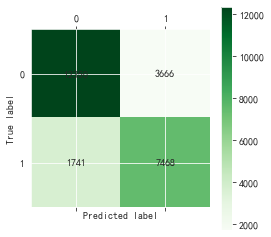

In [204]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def cm_plot(y, yp):
    from sklearn.metrics import confusion_matrix  # 导入混淆矩阵函数
    cm = confusion_matrix(y, yp)  # 混淆矩阵
    import matplotlib.pyplot as plt
    plt.matshow(cm, cmap=plt.cm.Greens)  # 画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar()  # 颜色标签
    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    return plt

cm_plot(y_test, predict_result).show()

In [207]:
save('/Users/tuyu/000000毕业设计/Flight_Delay/Model/model/BP_model.mat', 'net');